<a href="https://colab.research.google.com/github/bclee232/DLwP/blob/master/6_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  # add conv layers with downsampling
  model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                          input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  # convert 3D tensors to 1D vector as input for densely connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  # final layer is binary, use sigmoid to indicate probability
  model.add(layers.Dense(1, activation='sigmoid'))
  
  return model

Using TensorFlow backend.


In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', 
              metrics=['acc'])

In [12]:
# images are scaled down by factor of 10 compared to book (too long to download)
train_dir = '/content/gdrive/My Drive/cats_dogs_tiny/train'
validation_dir = '/content/gdrive/My Drive/cats_dogs_tiny/validation'

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [17]:
# book used 100 steps, 30 epochs, 50 validation steps
# the model was fit earlier
history = model.fit_generator(train_generator, steps_per_epoch=20, epochs=6, 
                              validation_data=validation_generator, 
                              validation_steps=10)

Epoch 1/6
20/20 [==============================] - 22s 1s/step - loss: 0.6661 - acc: 0.6250 - val_loss: 0.7339 - val_acc: 0.5100
Epoch 2/6
20/20 [==============================] - 21s 1s/step - loss: 0.6279 - acc: 0.6675 - val_loss: 0.7060 - val_acc: 0.5000
Epoch 3/6
20/20 [==============================] - 21s 1s/step - loss: 0.5938 - acc: 0.6850 - val_loss: 0.7271 - val_acc: 0.5100
Epoch 4/6
20/20 [==============================] - 21s 1s/step - loss: 0.5426 - acc: 0.7725 - val_loss: 0.7268 - val_acc: 0.6200
Epoch 5/6
20/20 [==============================] - 21s 1s/step - loss: 0.4891 - acc: 0.7875 - val_loss: 0.7221 - val_acc: 0.6400
Epoch 6/6
20/20 [==============================] - 21s 1s/step - loss: 0.4580 - acc: 0.8125 - val_loss: 0.7020 - val_acc: 0.6000


In [18]:
model.save('cats_and_dogs_small_1.h5')

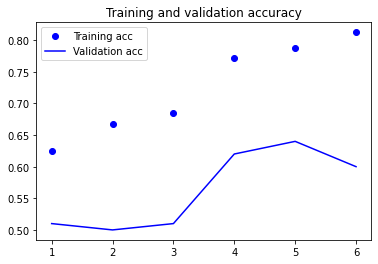

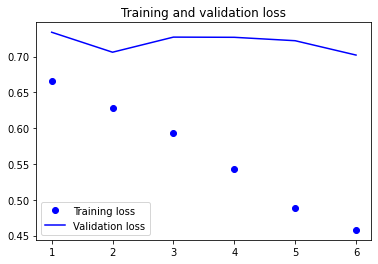

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
# data augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

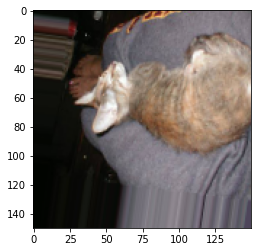

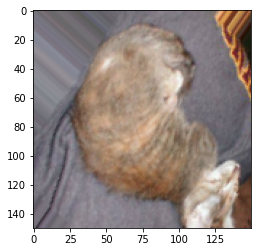

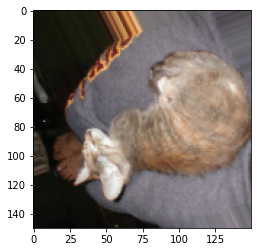

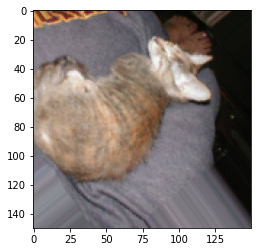

In [22]:
# show an augmented image
# This is module with image preprocessing utilities
from keras.preprocessing import image

train_cats_dir = '/content/gdrive/My Drive/cats_dogs_tiny/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [27]:
def augment_model():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=32, 
                          kernel_size=(3, 3), 
                          strides=(1, 1), 
                          padding='valid', 
                          activation='relu', 
                          input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64,
                          kernel_size=(3, 3),
                          activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(units=512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), 
                loss='binary_crossentropy',
                metrics=['acc'])
  
  return model

In [28]:
a_model = augment_model()
a_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [30]:
hist = a_model.fit_generator(generator=train_generator, 
                           steps_per_epoch=20, 
                           epochs=10, 
                           validation_data=validation_generator, 
                           validation_steps=10)
# this time, the training accuracy is lower than the validation
# suggest less overfitting (?)
# improvement from 64 to 70%

Epoch 1/10
20/20 [==============================] - 32s 2s/step - loss: 0.6977 - acc: 0.5053 - val_loss: 0.6753 - val_acc: 0.4924
Epoch 2/10
20/20 [==============================] - 32s 2s/step - loss: 0.6921 - acc: 0.5158 - val_loss: 0.6962 - val_acc: 0.5254
Epoch 3/10
20/20 [==============================] - 33s 2s/step - loss: 0.6878 - acc: 0.5299 - val_loss: 0.6777 - val_acc: 0.6326
Epoch 4/10
20/20 [==============================] - 33s 2s/step - loss: 0.6808 - acc: 0.5557 - val_loss: 0.3731 - val_acc: 0.5127
Epoch 5/10
20/20 [==============================] - 33s 2s/step - loss: 0.6820 - acc: 0.5458 - val_loss: 0.6517 - val_acc: 0.6970
Epoch 6/10
20/20 [==============================] - 32s 2s/step - loss: 0.6500 - acc: 0.6144 - val_loss: 0.5325 - val_acc: 0.6653
Epoch 7/10
20/20 [==============================] - 32s 2s/step - loss: 0.6690 - acc: 0.6109 - val_loss: 0.6409 - val_acc: 0.6818
Epoch 8/10
20/20 [==============================] - 35s 2s/step - loss: 0.6567 - acc: 0.62

In [31]:
a_model.save('cats_and_dogs_small_2.h5')

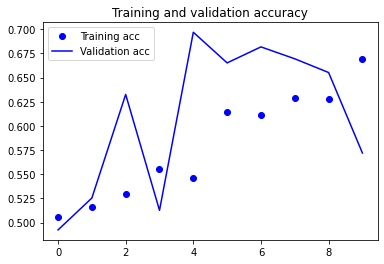

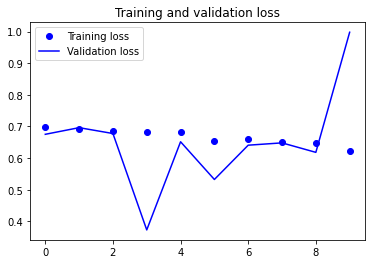

In [32]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()